In [1]:
# import pandas
import pandas as pd
# import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
users_data = pd.read_pickle("../data/users_data_final.pkl")
users_data

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,2.0,825.0,51,technician,married,tertiary,False,False,False,cellular,977,3,-1,0,None,True,2002-12-28,desktop
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,4.0,1729.0,71,retired,divorced,primary,False,False,False,cellular,456,2,-1,0,None,True,2010-11-18,desktop
45213,be32ba96-b178-4b54-b32a-f75b714793df,2.0,5715.0,72,retired,married,secondary,False,False,False,cellular,1127,5,184,3,success,True,1996-06-18,mobile
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,NaN,NaN,57,blue-collar,married,secondary,False,False,False,telephone,508,4,-1,0,None,False,1996-09-14,desktop


In [3]:
# shape of the data

users_data.shape

(45209, 19)

In [4]:
users_data.shape[1]

19

In [5]:
# structure of the data

users_data.info()

# there are eight non numerical data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [6]:
# identify missing data

users_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [7]:
# identify rows with missing data

users_data[users_data.job.isnull()]

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile
216,b3700520-0918-47dc-981a-92e4b94ba97b,3.0,28.0,47,None,married,None,False,False,False,None,338,2,-1,0,None,False,2002-03-29,mobile
354,4e3d9443-e905-4709-8cf7-749ada030ebb,NaN,NaN,59,None,divorced,None,False,False,False,None,347,3,-1,0,None,False,1989-10-01,mobile
876,9005ec91-d683-4301-aedb-d53d797a24e4,3.0,414.0,37,None,single,None,False,True,False,None,131,1,-1,0,None,False,1989-06-10,tablet
1072,3445d40f-4cff-4f63-b5e3-417112ea812e,3.0,50.0,29,None,single,primary,False,True,False,None,50,2,-1,0,None,False,2007-11-25,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44719,13cb2218-f67d-4929-84b5-a2095538c2fa,2.0,406.0,45,None,married,tertiary,False,False,False,cellular,314,1,-1,0,None,True,1996-03-05,mobile
44747,7dc71fa1-34ef-436d-b537-de8a2f95e7f9,NaN,NaN,64,None,married,None,False,False,False,telephone,378,4,-1,0,None,False,1992-11-14,mobile
44975,a70d6bb2-556b-4ec8-baac-e4904173d05b,2.0,326.0,28,None,single,None,False,False,False,cellular,450,1,231,1,success,True,2002-12-23,tablet
45146,c52147e6-078f-4486-94fe-58fd88cb57c8,NaN,NaN,77,None,married,None,False,False,False,telephone,207,1,185,3,success,False,1993-07-27,mobile


In [8]:
# summary statistics for all the data

users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


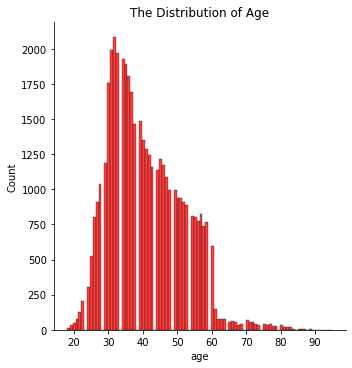

In [9]:
sns.displot(x=users_data.age, color="red")
plt.title("The Distribution of Age");

In [10]:
users_data.age.describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [11]:
# distribution for non numercial data

users_data['device'].value_counts()

mobile     27504
desktop    12112
tablet      5499
Name: device, dtype: int64

In [12]:
users_data['device'].value_counts(dropna=False, normalize=True)

mobile     0.608374
desktop    0.267911
tablet     0.121635
NaN        0.002079
Name: device, dtype: float64

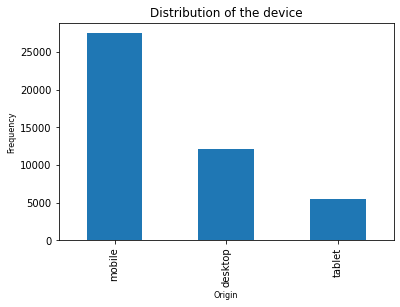

In [13]:
users_data['device'].value_counts().plot(kind = 'bar')
plt.title("Distribution of the device")
plt.ylabel("Frequency", size = 8)
plt.xlabel("Origin", size = 8);

In [14]:
# distribution of name

users_data['device'].value_counts()

mobile     27504
desktop    12112
tablet      5499
Name: device, dtype: int64